In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
data = pd.read_csv("Data/adult.csv")

### Get familiar with the dataset

In [3]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='str')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  str  
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  str  
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  str  
 6   occupation       48842 non-null  str  
 7   relationship     48842 non-null  str  
 8   race             48842 non-null  str  
 9   gender           48842 non-null  str  
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  str  
 14  income           48842 non-null  str  
dtypes: int64(6), str(9)
memory usage: 5.6 MB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Check Null values 

In [7]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Data Cleaning - replace '?' with NaN

In [8]:
data.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
data = data.replace("?", np.nan)
data.isin(["?"]).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Check and drop missing values

In [10]:
missing_per_col = (data.isna().sum()) / (len(data)) * 100
missing_per_col

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [11]:
data = data.dropna(how="any")
data.shape

(45222, 15)

### Check and drop duplicated data

In [13]:
dupl = data.duplicated().sum()
dupl

np.int64(47)

In [16]:
data = data.drop_duplicates()
data.shape

(45175, 15)

In [18]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Dropping educational-num, capital-gain and capital-loss columns

1. We're dropping educational-num since we have a column named education which relays the same info! Thereby, making this column unnecessary for the dataset.
2. We're dropping capital-gain and capital-loss since 75% of the values are 0, which renders them useless for data analysis.

In [20]:
data = data.drop(columns=["educational-num", "capital-gain", "capital-loss"])
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


### Univariate Analysis

Univariate analysis = analyzing ONE variable at a time

#### What is the distribution of the age column?

<Axes: ylabel='Frequency'>

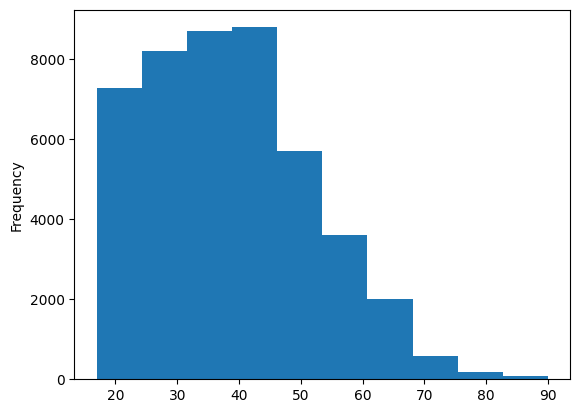

In [22]:
data["age"].plot(kind="hist")

### Find total number of people having age between 17 and 48 (Inclusive)

In [24]:
data["age"].between(17, 48).sum()

np.int64(34858)

### What is the distribution of the workclass column?

In [33]:
data["workclass"].unique()

<StringArray>
[         'Private',        'Local-gov', 'Self-emp-not-inc',
      'Federal-gov',        'State-gov',     'Self-emp-inc',
      'Without-pay']
Length: 7, dtype: str

<Axes: xlabel='workclass'>

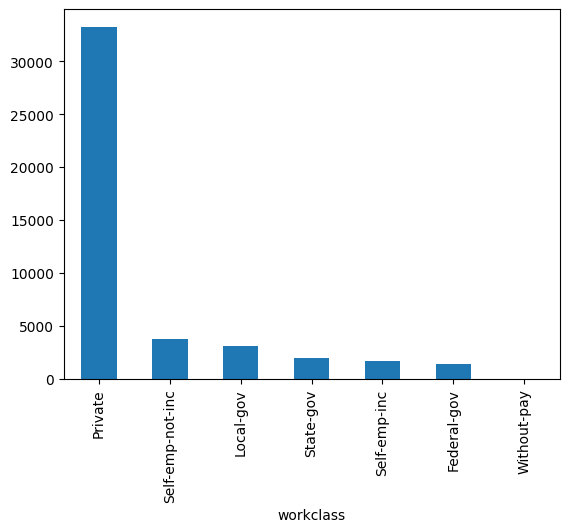

In [30]:
data["workclass"].value_counts().plot(kind="bar")

### How many people have Bachelor's and Master's degrees?

In [35]:
data["education"].unique()

<StringArray>
[        '11th',      'HS-grad',   'Assoc-acdm', 'Some-college',
         '10th',  'Prof-school',      '7th-8th',    'Bachelors',
      'Masters',      '5th-6th',    'Assoc-voc',          '9th',
    'Doctorate',         '12th',      '1st-4th',    'Preschool']
Length: 16, dtype: str

In [37]:
data["education"].str.match("bachelors|masters", case=False).sum()

np.int64(10072)